# Seminar 4. Locomotion control
## Plan
* Create a CPG consisting of 4 neurons
* Make them produce the alternating oscillations

## Homework
* Tune CPG parameters to obtain the desired frequency and phase lags

## Materials
Russell, A., Orchard, G., & Etienne-Cummings, R. (2007, May). Configuring of spiking central pattern generator networks for bipedal walking using genetic algorthms. In 2007 IEEE International Symposium on Circuits and Systems (pp. 1525-1528). IEEE.



## 1. Create CPG of Adaptive LIF neurons

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
import brian2 as b2
import numpy as np
import random

def plot_v_spikes(v_mon, s_mon, t_bounds=None, names=None):
    b2.figure(figsize=(12,4))
    b2.subplot(121)
    for i in range(len(v_mon.v)):
        if names:
            b2.plot(v_mon.t/b2.ms, v_mon.v[i], label=names[i])
        else:
            b2.plot(v_mon.t/b2.ms, v_mon.v[i], label=f'N_{i}')
    if t_bounds:
        b2.xlim(t_bounds)
    b2.xlabel('Time (ms)')
    b2.ylabel('v')
    b2.legend();
    b2.subplot(122)
    b2.plot(s_mon.t/b2.ms,s_mon.i, '.k')
    if t_bounds:
        b2.xlim(t_bounds)
    b2.xlabel('Time (ms)')
    b2.ylabel('Neuron num') 

N = 4
V_REST = 1.5
TAU_V = 15 * b2.ms
V_RESET = 0
VT_0 = 1
TAU_T = 40 * b2.ms
THETA = 0.7
W_SYN = -1.5

def alif_group(num_neurons, v_rest=V_REST,tau_v=TAU_V, 
               v_reset=V_RESET, vt_0=VT_0, 
               tau_t=TAU_T, theta=THETA):
    eqs = '''
        dv/dt = (v_rest-v)/tau_v: 1
        dvt/dt = (vt_0-vt)/tau_t : 1
        tau_v : second
        v_rest : 1
        v_reset : 1
        vt_0 : 1
        tau_t : second
        theta : 1
        '''
    reset = '''
        v = v_reset
        vt += theta
        '''
    taurefr = 2*b2.ms
    G = b2.NeuronGroup(num_neurons, model=eqs, reset=reset, threshold='v>vt',
                 method='linear', refractory=taurefr)
    G.tau_v = tau_v
    G.v_rest = v_rest
    G.v_reset = v_reset
    G.vt_0 = 'rand()'
    G.tau_t = tau_t
    G.theta = theta
    G.vt = v_rest
    return G

#def period(s_mon):
    

class CPG:
    
    def __init__(self):
        self.N = 4
        self.neurons = alif_group(self.N)
        self.spike_mon = b2.SpikeMonitor(self.neurons)
        self.v_mon = b2.StateMonitor(self.neurons, ["v", "vt"], record=True)
        self.pop_mon = b2.PopulationRateMonitor(self.neurons)
        self.create_synapses()
        self.net = b2.Network(self.neurons, self.synapses, self.spike_mon, self.v_mon, self.pop_mon)
            
    def create_synapses(self):
        self.synapses = b2.Synapses(self.neurons, self.neurons, on_pre='v_post += w_syn')
        self.synapses.connect(i=0, j=1)
        self.synapses.connect(i=1, j=0)
        self.synapses.connect(i=1, j=2)
        self.synapses.connect(i=2, j=1)
        self.synapses.connect(i=2, j=3)
        self.synapses.connect(i=3, j=2)
        

In [93]:
b2.start_scope()
cpg = CPG()
#PG = b2.PoissonGroup(1, 10*1/TAU_V)
cpg.net.run(500 * b2.ms, namespace={'w_syn':W_SYN})

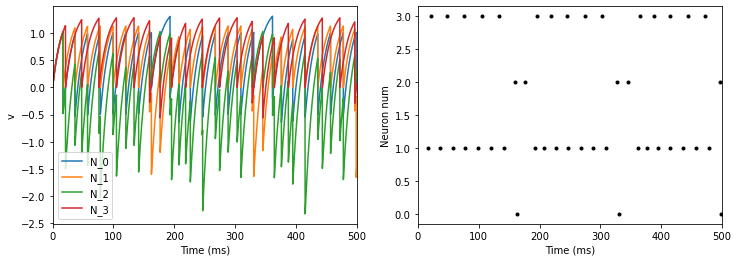

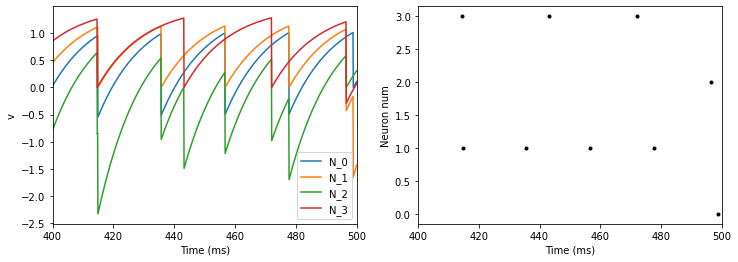

In [94]:
plot_v_spikes(cpg.v_mon, cpg.spike_mon, [0,500])
plot_v_spikes(cpg.v_mon, cpg.spike_mon, [400,500])
#plt.plot(cpg.v_mon.t/b2.ms, cpg.v_mon.v[0], label='v')
#plt.plot(cpg.v_mon.t/b2.ms, cpg.v_mon.vt[0], label='vt')
#plt.legend()

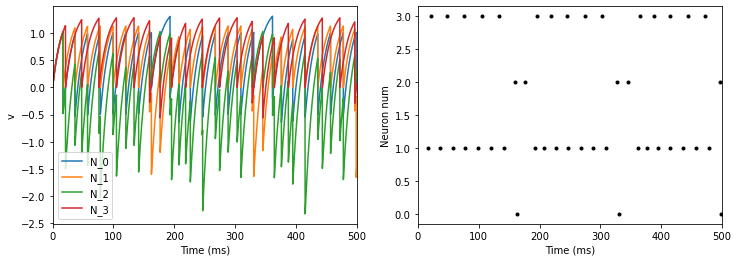

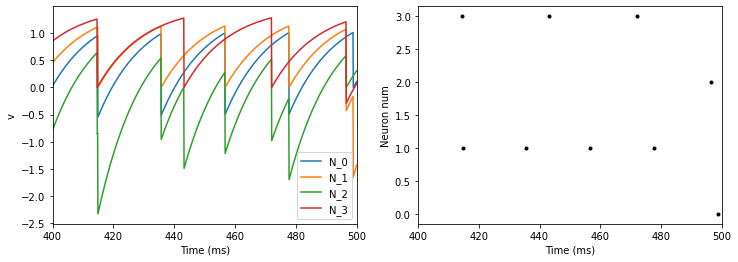

In [95]:
plot_v_spikes(cpg.v_mon, cpg.spike_mon, [0,500])
plot_v_spikes(cpg.v_mon, cpg.spike_mon, [400,500])

In [83]:
def period(s_mon):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-83-99d6cdc7a24a>, line 2)

In [96]:
times = np.array(cpg.spike_mon.t)
numbers = np.array(cpg.spike_mon.i)
times, numbers

(array([0.017 , 0.0212, 0.0367, 0.0478, 0.0574, 0.0761, 0.0783, 0.0993,
        0.1049, 0.1203, 0.1338, 0.1413, 0.1593, 0.1623, 0.1766, 0.1929,
        0.1954, 0.2075, 0.2185, 0.2262, 0.2458, 0.2465, 0.2673, 0.2743,
        0.2883, 0.3031, 0.3093, 0.3279, 0.3304, 0.3453, 0.3613, 0.3642,
        0.3758, 0.3873, 0.3945, 0.4146, 0.4148, 0.4356, 0.4431, 0.4566,
        0.4719, 0.4776, 0.4964, 0.4987]),
 array([1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 2, 0, 2, 1, 3, 1, 3, 1, 3, 1,
        1, 3, 1, 3, 1, 2, 0, 2, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 2, 0]))

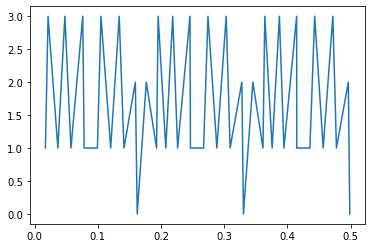

In [97]:
plt.plot(times, numbers)

In [98]:
spike_1 = cpg.spike_mon.t[cpg.spike_mon.i==0]
spike_2 = cpg.spike_mon.t[cpg.spike_mon.i==1]
spike_3 = cpg.spike_mon.t[cpg.spike_mon.i==2]
spike_4 = cpg.spike_mon.t[cpg.spike_mon.i==3]
delta_1=[spike_1[i+1]-spike_1[i] for i in range (len(spike_1) - 1)]
delta_2=[spike_2[i+1]-spike_2[i] for i in range (len(spike_2) - 1)]
delta_3=[spike_3[i+1]-spike_3[i] for i in range (len(spike_3) - 1)]
delta_4=[spike_4[i+1]-spike_4[i] for i in range (len(spike_4) - 1)]
print(np.mean(delta_1), delta_1)
print(np.mean(delta_2), delta_2)
print(np.mean(delta_3), delta_3)
print(np.mean(delta_4), delta_4)
num_per_1 = 0
list_per_1 = []
print(np.sum(delta_1/b2.ms))
print(np.mean(delta_1/b2.ms)) 
    
    
    
mean_1 = np.mean(delta_1/b2.ms)
for i in range(len(delta_1)):
    if delta_1[i]/b2.ms < mean_1:
        list_per_1.append(num_per_1)
    else:
        num_per_1 += 1
        list_per_1.append(num_per_1)
print(list_per_1)


spikes = []
deltas = []
for i in range(amount):
    spikes.append(cpg.spike_mon.t[cpg.spike_mon.i==i])
for i in range(amount):
    deltas.append([spikes[i][j+1]-spikes[i][j] for j in range (len(spikes[i]) - 1)])
means = [np.mean(deltas[i]/b2.ms) for i in range(amount)]
list_periods = []
for j in range(amount):
    list_periods.append()
    num_per = 0
    for i in range(len(deltas[j])):
    if deltas[j][i]/b2.ms < means[j]:
        list_periods[j].append(num_per)
    else:
        num_per += 1
        list_periods[j].append(num_per)

IndentationError: expected an indented block (<ipython-input-98-e04a87e76570>, line 42)

In [99]:
amount = 4
spikes = []
deltas = []
for i in range(amount):
    spikes.append(cpg.spike_mon.t[cpg.spike_mon.i==i])
for i in range(amount):
    deltas.append([spikes[i][j+1]-spikes[i][j] for j in range (len(spikes[i]) - 1)])
means = [np.mean(deltas[i]/b2.ms) for i in range(amount)]
list_periods = []
for j in range(amount):
    list_periods.append([])
    num_per = 0
    for i in range(len(deltas[j])):
        if deltas[j][i]/b2.ms < means[j]:
            list_periods[j].append(num_per)
        else:
            num_per += 1
            list_periods[j].append(num_per)
print(list_periods)

t_on = []
t_off = []
for j in range(amount):
    n = -1
    t_on.append([])
    t_off.append([])
    for i in range(len(list_periods[j])):
        if list_periods[j][i] > n:
            n += 1
            if i == 0:
                t_on[j].append(spikes[j][0]/b2.ms)
            elif i == len(list_periods[j]):
                t_off[j].append(spikes[j][-1]/b2.ms)
            else:
                t_on[j].append(spikes[j][i+1]/b2.ms)
                t_off[j].append(spikes[j][i]/b2.ms)
t_on_mean = []
t_off_mean = []
for i in range(amount):
    periods.append(np.mean(t_off[i]-t_on[i]))
    t_on_mean.append(np.mean(t_on[i]))
    t_off_mean.append(np.mean(t_off[i]))
print(np.mean(t_on_mean), np.mean(t_off_mean), np.mean(period))

[[0, 1], [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2], [0, 1, 1, 2], [0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]]


NameError: name 'periods' is not defined

In [ ]:
print(len(spikes[3]), len(deltas[3]))

(0.0, 500.0)

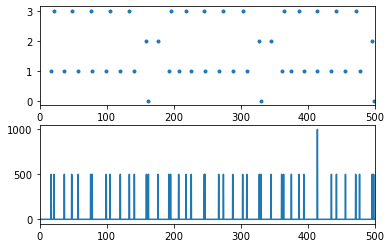

In [104]:
duration = 500 * b2.ms
plt.subplot(211)
plt.plot(cpg.spike_mon.t/b2.ms, cpg.spike_mon.i, '.')
plt.xlim(0, duration/b2.ms)

LFP = cpg.pop_mon

plt.subplot(212)
plt.plot(LFP.t/b2.ms, LFP.smooth_rate(window='flat', width=0.5*b2.ms)/b2.Hz)
plt.xlim(0, duration/b2.ms)

In [63]:
cpg.neurons

NeuronGroup(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='neurongroup_1')

In [64]:
Vr = 10
cpg.neurons.v = Vr
LFP = b2.PopulationRateMonitor(cpg.neurons)

In [65]:
LFP.smooth_rate(window='flat', width=2*b2.ms

SyntaxError: unexpected EOF while parsing (<ipython-input-65-99778f7dc88d>, line 1)

In [66]:
cpg.pop_mon

<PopulationRateMonitor, recording neurongroup_1>

In [90]:
LFP.v

AttributeError: No attribute with name v

In [91]:
cpg.neurons.v

<neurongroup_3.v: array([ 0.04095785,  0.44648544, -0.33764985,  1.17411201])>